# Plot 2D stability diagrams

A notebook to plot the linear stability of a grating over two parameter dimensions. The two parameters of the linear stability in these plots are the width of the Gaussian beam (normalised by the total grating length), $\bar{w}$, and the longitudinal sail velocity $v_x/c$. The data for the 2D plot is generated for a grating with user-chosen parameters, done in the separate file `generate_stability_diagram.py`. Here, the linear stability in the 2D plots is characterised by 5 regions, each region corresponding to the number (from 0 to 4) of eigenvalues with negative real part in that region. The same plot with the imaginary part of eigenvalues is also presented.

## Import modules

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['text.usetex'] = True

import numpy as np

import pickle

import sys
sys.path.append("../")

## Real part of eigenvalues

In [12]:
grating_type = "Ilic"
k_lambda = 1000
k_width = 1000
pkl_fname = rf'Data/{grating_type}_Stability_Diagram_klambda{k_lambda}_by_kwidth{k_width}_num_neg_zero.pkl'

with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

In [13]:
real_regions = data['real_stability']
imag_regions = data['imag_stability']
w_array = data['width_array']
v_array = data['v_array']
final_speed = data['final speed']
plt.rcParams['text.usetex'] = True

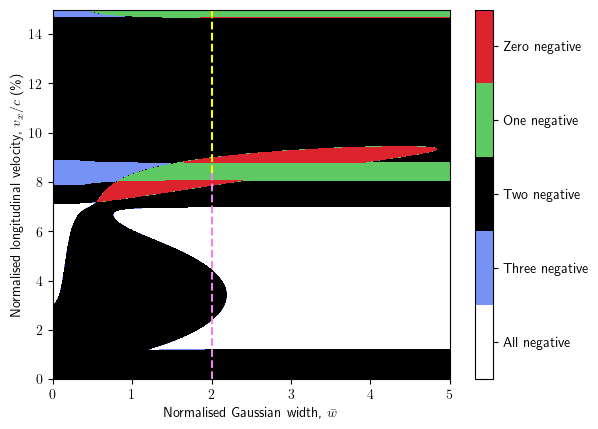

In [14]:
colours = np.array(["#ffffff","#7792f6","black","#5ec962","#dc232e"])
                   #   0.1     0.2         0.3     0.4         0.5
                   # 4 neg     3 neg       2 neg   1 neg       0 neg
cmap = ListedColormap(colours)
vmin, vmax = 0, 0.6  
tickmarks = [0.1, 0.2, 0.3, 0.4, 0.5]
ticks = np.array(["All negative", "Three negative","Two negative", "One negative", "Zero negative"])

# Real
fig, ax = plt.subplots(1)
contour = ax.contourf(w_array, 100*v_array, real_regions, cmap=cmap, levels=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
cbar = fig.colorbar(contour, ticks=tickmarks, boundaries=np.linspace(vmin, vmax, len(colours)+1), extend='neither')
cbar.set_ticklabels(ticks)

# ax.hlines(8.56,0,10,"w")

ax.set(xlabel=r"Normalised Gaussian width, $\bar{w}$", ylabel=r"Normalised longitudinal velocity, $v_x/c$ (\%)")
ax.set_ylim([0,final_speed])
ax.set_xlim([0,5])
ax.vlines(2,0,8.38,color="violet",linestyles="dashed")
ax.vlines(2,8.38,final_speed,color="yellow",linestyles="dashed")

# fig.savefig(f"Data/{grating_type}_realpart_stability_space.pdf", bbox_inches='tight')

## Imaginary part of eigenvalues

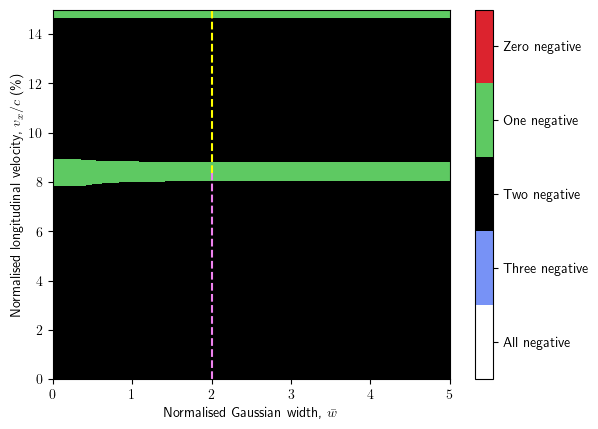

In [15]:
colours = np.array(["#ffffff","#7792f6","black","#5ec962","#dc232e"])
                   #   0.1     0.2         0.3     0.4         0.5
                   # 4 neg     3 neg       2 neg   1 neg       0 neg
cmap = ListedColormap(colours)
vmin, vmax = 0, 0.6  
tickmarks = [0.1, 0.2, 0.3, 0.4, 0.5]
ticks = np.array(["All negative", "Three negative","Two negative", "One negative", "Zero negative"])

# Real
fig, ax = plt.subplots(1)
contour = ax.contourf(w_array, 100*v_array, imag_regions, cmap=cmap, levels=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
cbar = fig.colorbar(contour, ticks=tickmarks, boundaries=np.linspace(vmin, vmax, len(colours)+1), extend='neither')
cbar.set_ticklabels(ticks)

# ax.hlines(8.56,0,10,"w")

ax.set(xlabel=r"Normalised Gaussian width, $\bar{w}$", ylabel=r"Normalised longitudinal velocity, $v_x/c$ (\%)")
ax.set_ylim([0,final_speed])
ax.set_xlim([0,5])
ax.vlines(2,0,8.38,color="violet",linestyles="dashed")
ax.vlines(2,8.38,final_speed,color="yellow",linestyles="dashed")

# fig.savefig(f"Data/{grating_type}_imagpart_stability_space.pdf", bbox_inches='tight')